# ### Anaconda & Python Version:

The version of the notebook server is 5.0.0 and is running on:
Python 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]

Current Kernel Information:
Python 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Type 'copyright', 'credits' or 'license' for more information
IPython 6.1.0 -- An enhanced Interactive Python. Type '?' for help.

#### Anaconda 5.0.1 (not sure)

In [1]:
# Versions of Libraries: (Code: 'pip list' in anaconda prompt)
# Check version of anaconda - 'conda list anaconda$' or 'conda info' in anaconda command prompt
# Check version of python - 'python' in anaconda command prompt

### Problem Type: Credit Card Application Fraud detection 
###                  (Outlier/Anomaly detection)

In [2]:
### Problem: Credit Card application customer data (with accept/reject variable) and identifying fraud - unsupervised
### Problem Type: Fraud detection, Outlier/Anomaly detection
### Steps:
#### 0. 
#### 1. 
#### 2. 
#### 3. 
#### 4. 
#### 5. 
#### 6. 
#### 7.

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn # same as scikit-learn

In [2]:
## importing the dataset
# dataset: credit card applicants attributes, select/reject variable also present
dataset = pd.read_csv('C:/Users/anurag.trivedi/2. Data/4. Self-Organizing Maps/SOM/Self_Organizing_Maps/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values # all columns except last
Y = dataset.iloc[:, -1].values # last column, which is credit card application accepted/rejected, it is separated as fraud expected to be caught before approval 
# view data as csv
# np.savetxt("C:/Users/anurag.trivedi/2. Data/4. Self-Organizing Maps/SOM/Self_Organizing_Maps/Temp.csv", X, delimiter=",")

In [3]:
## feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
np.savetxt("C:/Users/anurag.trivedi/2. Data/4. Self-Organizing Maps/SOM/Self_Organizing_Maps/Temp.csv", X, delimiter=",")

In [4]:
## Training the SOM
# using class created by 'Giuseppe Vettigli'(GV) - search minisom 1.0 internet
# Udemy has provided 'minisom.py' by GV, keep that in working directory 'C:\\Users\\anurag.trivedi\\1. Codes'
# import minisom (or can use PIP command to load package)
from minisom import MiniSom
som = MiniSom(x=9, y=9, input_len=15, sigma=1.0, learning_rate=0.5) # creating object, initializing som
# x,y are dimensions of 2D output; input_len are #variables in input; sigma-radius of weight update; lr-magnitude of update
# this means x*y or 10*10/20*20 neurons, and all customers(~700) will be mapped to one neuron at a time
# Note: nearly 700 robservations in data
som.random_weights_init(X)
som.train_random(X, num_iteration=150)

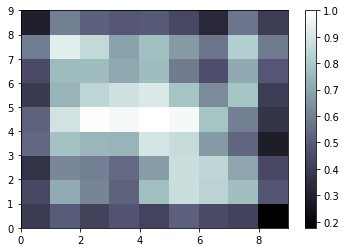

Populating the interactive namespace from numpy and matplotlib


In [5]:
## Visualizing the results
# How to detect outliers:
# MID(Mean Inter-Neuron Distance) is calculated for each winning node, it is the mean distance of a winning node from its 
# neighboring nodes. Higher MID means higher chances of winning node to be an outlier. We will focus on higher MID winning 
# nodes and tag them as outliers (would be white colored) - then domain consultation required to check which ones are risky

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T) # transpose of MID matrix
colorbar() # to give color legend, to check if white means high MID or low MID
plt.show() # use this command for matplotlib to show image on Jupyter Notebook

# this line is to increase plot size
%pylab inline
figsize(12, 9) # 10,6; 12,9 etc give good size and shape

In [6]:
## Explaining the graph & identifying outliers:
# Darker spots-low MID neurons which means they are closer to neighboring neurons
# White spots-high MID neurons which means they are far away from neighboring neurons and hence can be outliers/fraud/anomaly

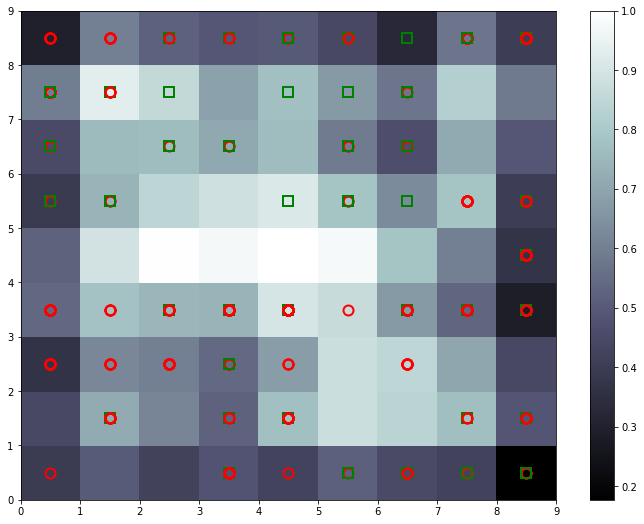

Populating the interactive namespace from numpy and matplotlib


In [7]:
## Adding Approved/Reject marker for each cell:
# Also helps in visualizing, which nodes did not get customers mapped to it; if too many nodes vacant, then should reduce nodes
# red circle would signify rejected customer and green square would signify approved customer
# can help visualize that which outliers(marked as risky after domain consultation) got loans approved and hence at risk

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T) # transpose of MID matrix
colorbar() # to give color legend, to check if white means high MID or low MID
markers = ['o', 's'] # o is circle, s is square
colors = ['r', 'g'] # red circle if customer didn't get approval, green square is customer got approval

# below code is to overlay Approved/Reject from Y on ach cell of output matrix
for i, x in enumerate(X): # i and x are index and customer vector(row) in 2d input array X
    w = som.winner(x)     # w is coordinates of winning node in output matrix like (5,4)
    plot(w[0] + 0.5,
         w[1] + 0.5,      # w[0],w[1] places o/s in left corner of each cell in output matrix, but +0.5 will place in center
         markers[Y[i]],   # if Y[i] is 0, then 'o' else 's'
         markeredgecolor = colors[Y[i]], # ensures only edges of symbol are colored
         markerfacecolor = 'None',       # ensures inside of marker is nothing
         markersize = 10,
         markeredgewidth = 2)
    
plt.show() # use this command for matplotlib to show image on Jupyter Notebook

# this line is to increase plot size
%pylab inline
figsize(12, 9) # 10,6; 12,9 etc give good size and shape

In [8]:
## Identifying Customers associated with white nodes:

# let's consider only (x,y)=(3,2) & (3,3) coordinates in output matrix as fraud, we need to find these customers
# Note: (x,y) is (x-axis, y-axis) orientation; counting starts from 0 
mappings = som.win_map(X) # is a dictionary, key: coordinates of winning nodes, value: list of customers associated with key
# converting dictionary to DF for better visualization
# mappings_df = pd.DataFrame.from_dict(mappings, orient='index')
# mappings_df
frauds = np.concatenate ( ( mappings[(3,2)], mappings[(3,3)] ) , axis=0 ) # not using (4,3) as no customer mapped to the node
# frauds - values are scaled, need to inverse transform
frauds = sc.inverse_transform(frauds)
frauds = pd.DataFrame(frauds) # convert to df for better visualization
frauds
# Note: these 45 customers are potential frauds
# Ideally, each white winning node & its associated customers should be manually examined for fraudulent characteristics

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15698271.0,1.0,28.92,0.375,2.0,8.0,4.0,0.290,0.0,0.0,0.0,0.0,2.0,220.0,141.0
1,15706637.0,1.0,20.00,7.000,2.0,8.0,4.0,0.500,0.0,0.0,0.0,0.0,2.0,0.0,1.0
2,15778589.0,1.0,20.42,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0,1.0
3,15702030.0,1.0,24.58,1.250,2.0,8.0,4.0,0.250,0.0,0.0,0.0,0.0,2.0,110.0,1.0
4,15666297.0,1.0,23.92,0.665,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,100.0,1.0
5,15737627.0,1.0,16.17,0.040,2.0,8.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,0.0,1.0
6,15709459.0,1.0,29.42,1.250,2.0,9.0,4.0,1.750,0.0,0.0,0.0,0.0,2.0,200.0,1.0
7,15752139.0,1.0,36.50,4.250,2.0,11.0,4.0,3.500,0.0,0.0,0.0,0.0,2.0,454.0,51.0
8,15766906.0,1.0,29.83,3.500,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,216.0,1.0
9,15798895.0,1.0,34.08,2.500,2.0,8.0,4.0,1.000,0.0,0.0,0.0,0.0,2.0,460.0,17.0


In [50]:
# Summary Notes:
# 1.
# How to identify optimal (x*y) nodes in output matrix
# Start with 1/5th ot 1/10th(or maybe some other) ratio of number of observations vs nodes(x,y)
# Add Approved/Reject marker for each cell (or create similar column if not present)
# Helps in visualizing which nodes did not get customers mapped to it
#    if too many nodes vacant, then should reduce nodes
#    if all nodes are mapped, then should increase nodes
# Do above till very few nodes are vacant

# 2. 
# For outlier, lesser nodes are better visualized; for clustering, more nodes are better visualized